In [1]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer

In [2]:
# read test data and training data
train_data = pandas.read_csv("all/train.csv")
test_data = pandas.read_csv("all/test.csv")

In [3]:
# Get a big idea of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# check non integer value column
stringData = train_data.select_dtypes(include='object')

stringData.info()
stringData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


## Preprocessing
#### Drop ID

In [5]:
train_data.drop('Id',axis=1,inplace=True)

#### Visualize SalesPrice

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


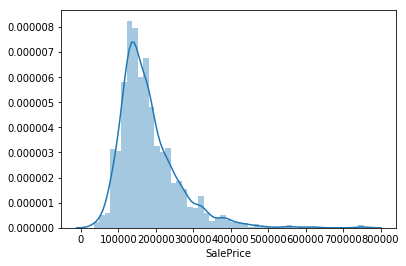

In [6]:
sns.distplot(train_data['SalePrice']);

#### Take log of the sales price

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


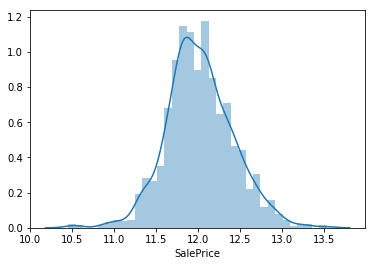

In [7]:
train_data.SalePrice = np.log1p(train_data.SalePrice)

sns.distplot(train_data['SalePrice']);

## Look at features

#### Check missing data

In [8]:
# check the missing data rate
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pandas.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


#### According to data description， change the string value

In [9]:
# PoolQC with NaN means no pool, so we put None instead
train_data.PoolQC = train_data.PoolQC.fillna("None")
test_data.PoolQC = test_data.PoolQC.fillna("None")

In [10]:
# MiscFeature: Miscellaneous feature not covered in other categories
# NA means None, so we repaced with None
train_data.MiscFeature = train_data.MiscFeature.fillna("None")
test_data.MiscFeature = test_data.MiscFeature.fillna("None")

In [11]:
# If Alley is NA means there is no Alley access, so we change it to None
train_data.Alley = train_data.Alley.fillna("None")
test_data.Alley = test_data.Alley.fillna("None")

In [12]:
# If Fence is NA means there is no Fence
train_data.Fence = train_data.Fence.fillna("None")
test_data.Fence = test_data.Fence.fillna("None")

In [13]:
# If FireplaceQu is NA means there is no Fireplace
train_data.FireplaceQu = train_data.FireplaceQu.fillna("None")
test_data.FireplaceQu = test_data.FireplaceQu.fillna("None")

In [14]:
# If the house does not have a garage, GarageType GarageFinish GarageQual and GarageCond will be Na
for column in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    train_data[column] = train_data[column].fillna("None")
    test_data[column] = test_data[column] .fillna("None")

In [15]:
# If there is no basement, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual will be Na,
for column in ("BsmtFinType2", "BsmtExposure", "BsmtFinType1", "BsmtCond", "BsmtQual"):
    train_data[column] = train_data[column].fillna("None")
    test_data[column] = test_data[column] .fillna("None")

In [16]:
# Masonry veneer type
train_data.MasVnrType = train_data.MasVnrType.fillna("None")
test_data.MasVnrType = test_data.MasVnrType.fillna("None")

In [17]:
# check the missing data rate
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pandas.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio
LotFrontage,17.739726
GarageYrBlt,5.547945
MasVnrArea,0.547945
Electrical,0.068493


In [18]:
test_data_na = (test_data.isnull().sum() / len(train_data)) * 100
test_data_na = test_data_na.drop(test_data_na[test_data_na == 0].index).sort_values(ascending=False)
missing_test_data = pandas.DataFrame({'Missing Ratio' :test_data_na})
missing_test_data

,Missing Ratio
LotFrontage,15.547945
GarageYrBlt,5.342466
MasVnrArea,1.027397
MSZoning,0.273973
Functional,0.136986
Utilities,0.136986
BsmtHalfBath,0.136986
BsmtFullBath,0.136986
BsmtFinSF1,0.068493
Exterior1st,0.068493


### Look deeper of the missing value

#### GrageYrBlt

In [19]:
print(np.isnan(train_data.GarageYrBlt).sum())
print(train_data.GarageType.value_counts())

81
Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


Looks like when there is no Garage, the GarageYrBlt will be nan

In [20]:
# since there is no garage, so we will set the year build at 0
train_data.GarageYrBlt = train_data.GarageYrBlt.fillna(0)
test_data.GarageYrBlt = test_data.GarageYrBlt.fillna(0)

# for testing data, GarageArea and GarageCars also has missing vlaue, we set them to 0 because they does not have garage
test_data.GarageArea = test_data.GarageArea.fillna(0)
test_data.GarageCars = test_data.GarageCars.fillna(0)


In [21]:
print(np.isnan(train_data.GarageYrBlt).sum())

0


#### MasVnrArea

In [22]:
print(np.isnan(train_data.MasVnrArea).sum())
print(train_data.MasVnrType.value_counts())

8
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [23]:
train_data["MasVnrArea"] = train_data["MasVnrArea"].fillna(0)
test_data["MasVnrArea"] = test_data['MasVnrArea'].fillna(0)

#### TotalBsmtSF and related in testing data

In [24]:
test_data["TotalBsmtSF"] = test_data['TotalBsmtSF'].fillna(0)
test_data["BsmtFinSF1"] = test_data['BsmtFinSF1'].fillna(0)
test_data["BsmtFinSF2"] = test_data['BsmtFinSF2'].fillna(0)
test_data["BsmtUnfSF"] = test_data['BsmtUnfSF'].fillna(0)


In [25]:
# check the missing data rate
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pandas.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio
LotFrontage,17.739726
Electrical,0.068493


In [26]:
test_data_na = (test_data.isnull().sum() / len(train_data)) * 100
test_data_na = test_data_na.drop(test_data_na[test_data_na == 0].index).sort_values(ascending=False)
missing_test_data = pandas.DataFrame({'Missing Ratio' :test_data_na})
missing_test_data

,Missing Ratio
LotFrontage,15.547945
MSZoning,0.273973
Functional,0.136986
BsmtHalfBath,0.136986
BsmtFullBath,0.136986
Utilities,0.136986
SaleType,0.068493
KitchenQual,0.068493
Exterior2nd,0.068493
Exterior1st,0.068493


## There are still some missing values. However, it does not make any sense if we just add None or 0. We want to use imputation. Before do Imputation, We need to encode those string features

In [27]:
list(train_data.select_dtypes(exclude=['int', 'float']).columns.values)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
train_data.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [29]:
train_data.MSZoning = train_data.MSZoning.map({'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4})
test_data.MSZoning = test_data.MSZoning.map({'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4})

In [30]:
train_data.Street = train_data.Street.map({'Grvl' : 1, 'Pave' : 2})
test_data.Street = test_data.Street.map({'Grvl' : 1, 'Pave' : 2})

In [31]:
train_data.Alley = train_data.Alley.map({'None':0, 'Grvl' : 1, 'Pave' : 2})
test_data.Alley = test_data.Alley.map({'None':0, 'Grvl' : 1, 'Pave' : 2})

In [32]:
train_data.LotShape = train_data.LotShape.map({"Reg" : 1, "IR1" : 2, "IR2" : 3, "IR3" : 4})
test_data.LotShape = test_data.LotShape.map({"Reg" : 1, "IR1" : 2, "IR2" : 3, "IR3" : 4})

In [33]:
train_data.LandContour = train_data.LandContour.map({
    'Lvl' : 1,
    'Bnk' : 2,
    'HLS' : 3,
    'Low' : 4
})
test_data.LandContour = test_data.LandContour.map({
    'Lvl' : 1,
    'Bnk' : 2,
    'HLS' : 3,
    'Low' : 4
})

In [34]:
train_data.Utilities = train_data.Utilities.map({
    'AllPub' : 1,
    'NoSewr' : 2,
    'NoSeWa' : 3,
    'ELO' :4
})
test_data.Utilities = test_data.Utilities.map({
    'AllPub' : 1,
    'NoSewr' : 2,
    'NoSeWa' : 3,
    'ELO' :4
})

In [35]:
train_data.LotConfig = train_data.LotConfig.map({
    'Inside' : 1,
    'Corner' : 2,
    'CulDSac' : 3,
    'FR2' : 4,
    'FR3' : 5
})
test_data.LotConfig = test_data.LotConfig.map({
    'Inside' : 1,
    'Corner' : 2,
    'CulDSac' : 3,
    'FR2' : 4,
    'FR3' : 5
})

In [36]:
train_data.LandSlope = train_data.LandSlope.map({
    'Gtl' : 3,
    'Mod' : 2,
    'Sev' : 1
})
test_data.LandSlope = test_data.LandSlope.map({
    'Gtl' : 3,
    'Mod' : 2,
    'Sev' : 1
})

In [37]:
Neighborhoodkeys =  train_data.Neighborhood.unique()
NeighborhoodMap = {}
i = 1
for key in Neighborhoodkeys:
    NeighborhoodMap[key] = i
    i += 1
print(NeighborhoodMap)

{'CollgCr': 1, 'Veenker': 2, 'Crawfor': 3, 'NoRidge': 4, 'Mitchel': 5, 'Somerst': 6, 'NWAmes': 7, 'OldTown': 8, 'BrkSide': 9, 'Sawyer': 10, 'NridgHt': 11, 'NAmes': 12, 'SawyerW': 13, 'IDOTRR': 14, 'MeadowV': 15, 'Edwards': 16, 'Timber': 17, 'Gilbert': 18, 'StoneBr': 19, 'ClearCr': 20, 'NPkVill': 21, 'Blmngtn': 22, 'BrDale': 23, 'SWISU': 24, 'Blueste': 25}


In [38]:
train_data.Neighborhood = train_data.Neighborhood.map(NeighborhoodMap)
test_data.Neighborhood = test_data.Neighborhood.map(NeighborhoodMap)

In [39]:
ConditionMap = {'Norm': 3, 'Feedr': 4, 'PosN': 2, 'Artery': 4, 'RRAe': 1, 'RRNn': 1, 'RRAn': 1, 'PosA': 2, 'RRNe': 1}

train_data.Condition1 = train_data.Condition1.map(ConditionMap)
train_data.Condition2 = train_data.Condition2.map(ConditionMap)
test_data.Condition1 = test_data.Condition1.map(ConditionMap)
test_data.Condition2 = test_data.Condition2.map(ConditionMap)

In [40]:
train_data.BldgType = train_data.BldgType.map({'1Fam': 5, '2FmCon' :4, 'Duplx' :3, 'TwnhsE': 2, 'TwnhsI':1})
test_data.BldgType = test_data.BldgType.map({'1Fam': 5, '2FmCon' :4, 'Duplx' :3, 'TwnhsE': 2, 'TwnhsI':1})

In [41]:
train_data.HouseStyle = train_data.HouseStyle.map({'2Story': 1, '1Story': 2, '1.5Fin': 3, '1.5Unf': 4, 'SFoyer': 5, 'SLvl': 6, '2.5Unf': 7, '2.5Fin': 8})
test_data.HouseStyle = test_data.HouseStyle.map({'2Story': 1, '1Story': 2, '1.5Fin': 3, '1.5Unf': 4, 'SFoyer': 5, 'SLvl': 6, '2.5Unf': 7, '2.5Fin': 8})

In [42]:
train_data.RoofStyle = train_data.RoofStyle.map({'Gable': 1, 'Hip': 2, 'Gambrel': 3, 'Mansard': 4, 'Flat': 5, 'Shed': 6})
test_data.RoofStyle = test_data.RoofStyle.map({'Gable': 1, 'Hip': 2, 'Gambrel': 3, 'Mansard': 4, 'Flat': 5, 'Shed': 6})

In [43]:
train_data.RoofMatl = train_data.RoofMatl.map({'CompShg': 1, 'WdShngl': 2, 'Metal': 3, 'WdShake': 4, 'Membran': 5, 'Tar&Grv': 6, 'Roll': 7, 'ClyTile': 8})
test_data.RoofMatl = test_data.RoofMatl.map({'CompShg': 1, 'WdShngl': 2, 'Metal': 3, 'WdShake': 4, 'Membran': 5, 'Tar&Grv': 6, 'Roll': 7, 'ClyTile': 8})

In [44]:
ExteriorMap = {'VinylSd': 1, 'MetalSd': 2, 'Wd Sdng': 3, 'HdBoard': 4, 'BrkFace': 5, 'WdShing': 6, 'CemntBd': 7, 'Plywood': 8, 'AsbShng': 9, 'Stucco': 10, 'BrkComm': 11, 'AsphShn': 12, 'Stone': 13, 'ImStucc': 14, 'CBlock': 15}
train_data.Exterior1st = train_data.Exterior1st.map(ExteriorMap)
train_data.Exterior2nd = train_data.Exterior2nd.map(ExteriorMap)
test_data.Exterior1st = test_data.Exterior1st.map(ExteriorMap)
test_data.Exterior2nd = test_data.Exterior2nd.map(ExteriorMap)

In [45]:
# since has none, so we just samplify this featrue
train_data.MasVnrType = train_data.MasVnrType.map({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, "Stone" : 1, "None" : 0})
test_data.MasVnrType = test_data.MasVnrType.map({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, "Stone" : 1, "None" : 0})

In [46]:
conditionMap = {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5}

In [47]:
train_data.ExterCond = train_data.ExterCond.map(conditionMap)
test_data.ExterCond = test_data.ExterCond.map(conditionMap)
train_data.ExterQual = train_data.ExterQual.map(conditionMap)
test_data.ExterQual = test_data.ExterQual.map(conditionMap)
train_data.BsmtQual = train_data.BsmtQual.map(conditionMap)
test_data.BsmtQual = test_data.BsmtQual.map(conditionMap)
train_data.BsmtCond = train_data.BsmtCond.map(conditionMap)
test_data.BsmtCond = test_data.BsmtCond.map(conditionMap)
train_data.HeatingQC = train_data.HeatingQC.map(conditionMap)
test_data.HeatingQC = test_data.HeatingQC.map(conditionMap)
train_data.KitchenQual = train_data.KitchenQual.map(conditionMap)
test_data.KitchenQual = test_data.KitchenQual.map(conditionMap)
train_data.FireplaceQu = train_data.FireplaceQu.map(conditionMap)
test_data.FireplaceQu = test_data.FireplaceQu.map(conditionMap)
train_data.GarageQual = train_data.GarageQual.map(conditionMap)
test_data.GarageQual = test_data.GarageQual.map(conditionMap)
train_data.GarageCond = train_data.GarageCond.map(conditionMap)
test_data.GarageCond = test_data.GarageCond.map(conditionMap)
train_data.PoolQC = train_data.PoolQC.map(conditionMap)
test_data.PoolQC = test_data.PoolQC.map(conditionMap)


In [48]:
train_data.Foundation = train_data.Foundation.map({'PConc': 1, 'CBlock': 2, 'BrkTil': 3, 'Wood': 4, 'Slab': 5, 'Stone': 6})
test_data.Foundation = test_data.Foundation.map({'PConc': 1, 'CBlock': 2, 'BrkTil': 3, 'Wood': 4, 'Slab': 5, 'Stone': 6})



In [49]:
train_data.BsmtExposure = train_data.BsmtExposure.map({"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3, "None" : 0})
test_data.BsmtExposure = test_data.BsmtExposure.map({"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3, "None" : 0})

In [50]:
BsmtFinTypeMap = {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}

In [51]:
train_data.BsmtFinType1 = train_data.BsmtFinType1.map(BsmtFinTypeMap)
train_data.BsmtFinType2 = train_data.BsmtFinType2.map(BsmtFinTypeMap)
test_data.BsmtFinType1 = test_data.BsmtFinType1.map(BsmtFinTypeMap)
test_data.BsmtFinType2 = test_data.BsmtFinType2.map(BsmtFinTypeMap)

In [52]:
train_data.Heating = train_data.Heating.map({'GasA': 1, 'GasW': 2, 'Grav': 3, 'Wall': 4, 'OthW': 5, 'Floor': 6})
test_data.Heating = test_data.Heating.map({'GasA': 1, 'GasW': 2, 'Grav': 3, 'Wall': 4, 'OthW': 5, 'Floor': 6})

In [53]:
train_data.CentralAir = train_data.CentralAir.map({'Y': 1, 'N': 0})
test_data.CentralAir = test_data.CentralAir.map({'Y': 1, 'N': 0})

In [54]:
train_data.Electrical = train_data.Electrical.map({'SBrkr': 1, 'FuseF': 2, 'FuseA': 3, 'FuseP': 4, 'Mix': 5})
test_data.Electrical = test_data.Electrical.map({'SBrkr': 1, 'FuseF': 2, 'FuseA': 3, 'FuseP': 4, 'Mix': 5})

In [55]:
train_data.Functional = train_data.Functional.map({'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6})
test_data.Functional = test_data.Functional.map({'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6})

In [56]:
train_data.GarageType = train_data.GarageType.map({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'None':0, 'Basement':4, 'CarPort':5, '2Types':6})
test_data.GarageType = test_data.GarageType.map({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'None':0, 'Basement':4, 'CarPort':5, '2Types':6})

In [57]:
train_data.GarageFinish = train_data.GarageFinish.map({'RFn': 1, 'Unf': 2, 'Fin': 3, 'None': 0})
test_data.GarageFinish = test_data.GarageFinish.map({'RFn': 1, 'Unf': 2, 'Fin': 3, 'None': 0})

In [58]:
train_data.PavedDrive = train_data.PavedDrive.map({'Y':3, 'N':1, 'P':2})
test_data.PavedDrive = test_data.PavedDrive.map({'Y':3, 'N':1, 'P':2})

In [59]:
train_data.Fence = train_data.Fence.map({'None':0, 'MnPrv':1, 'GdPrv':2, 'GdWo':3, 'MnWw':4})
test_data.Fence = test_data.Fence.map({'None':0, 'MnPrv':1, 'GdPrv':2, 'GdWo':3, 'MnWw':4})



In [60]:
train_data.MiscFeature = train_data.MiscFeature.map({'None':0, 'Shed':1, 'Othr':2, 'Gar2':3, 'TenC':4})
test_data.MiscFeature = test_data.MiscFeature.map({'None':0, 'Shed':1, 'Othr':2, 'Gar2':3, 'TenC':4})



In [61]:
train_data.SaleType = train_data.SaleType.map({'WD': 1, 'New': 2, 'COD': 3, 'ConLD': 4, 'ConLI': 5, 'CWD': 6, 'ConLw': 7, 'Con': 8, 'Oth': 9})
test_data.SaleType = test_data.SaleType.map({'WD': 1, 'New': 2, 'COD': 3, 'ConLD': 4, 'ConLI': 5, 'CWD': 6, 'ConLw': 7, 'Con': 8, 'Oth': 9})

In [62]:
train_data.SaleCondition = train_data.SaleCondition.map({'Normal': 1, 'Abnorml': 2, 'Partial': 3, 'AdjLand': 4, 'Alloca': 5, 'Family': 6})
test_data.SaleCondition = test_data.SaleCondition.map({'Normal': 1, 'Abnorml': 2, 'Partial': 3, 'AdjLand': 4, 'Alloca': 5, 'Family': 6})

SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
ExterQual       0.678840
KitchenQual     0.667893
GarageArea      0.650888
BsmtQual        0.615804
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
FireplaceQu     0.546362
TotRmsAbvGrd    0.534422
Name: SalePrice, dtype: float64


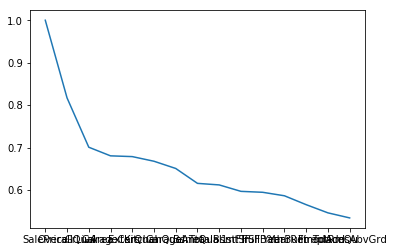

In [63]:
correlated = train_data.corr()
correlated = correlated.loc['SalePrice']
correlated = correlated.sort_values(ascending=False)

print(correlated.head(15))
plt.plot(correlated.head(15))

# Until now, all data are int or float

#### Using imputer to imput missing value 

<Figure size 432x288 with 0 Axes>

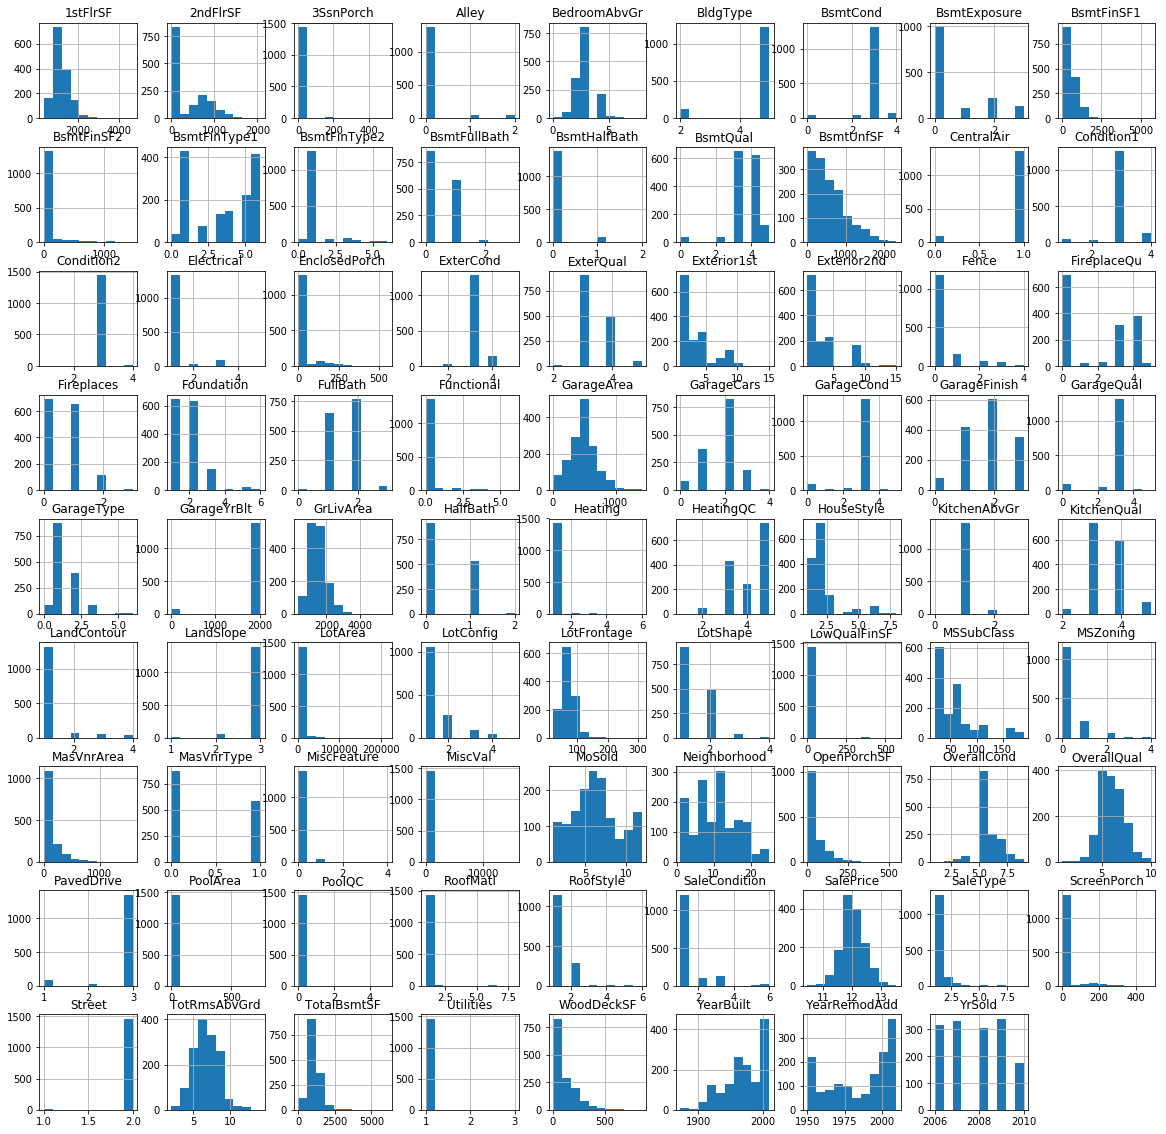

<Figure size 432x288 with 0 Axes>

In [64]:
train_data.hist(figsize=(20,20))
plt.figure()

<Figure size 432x288 with 0 Axes>

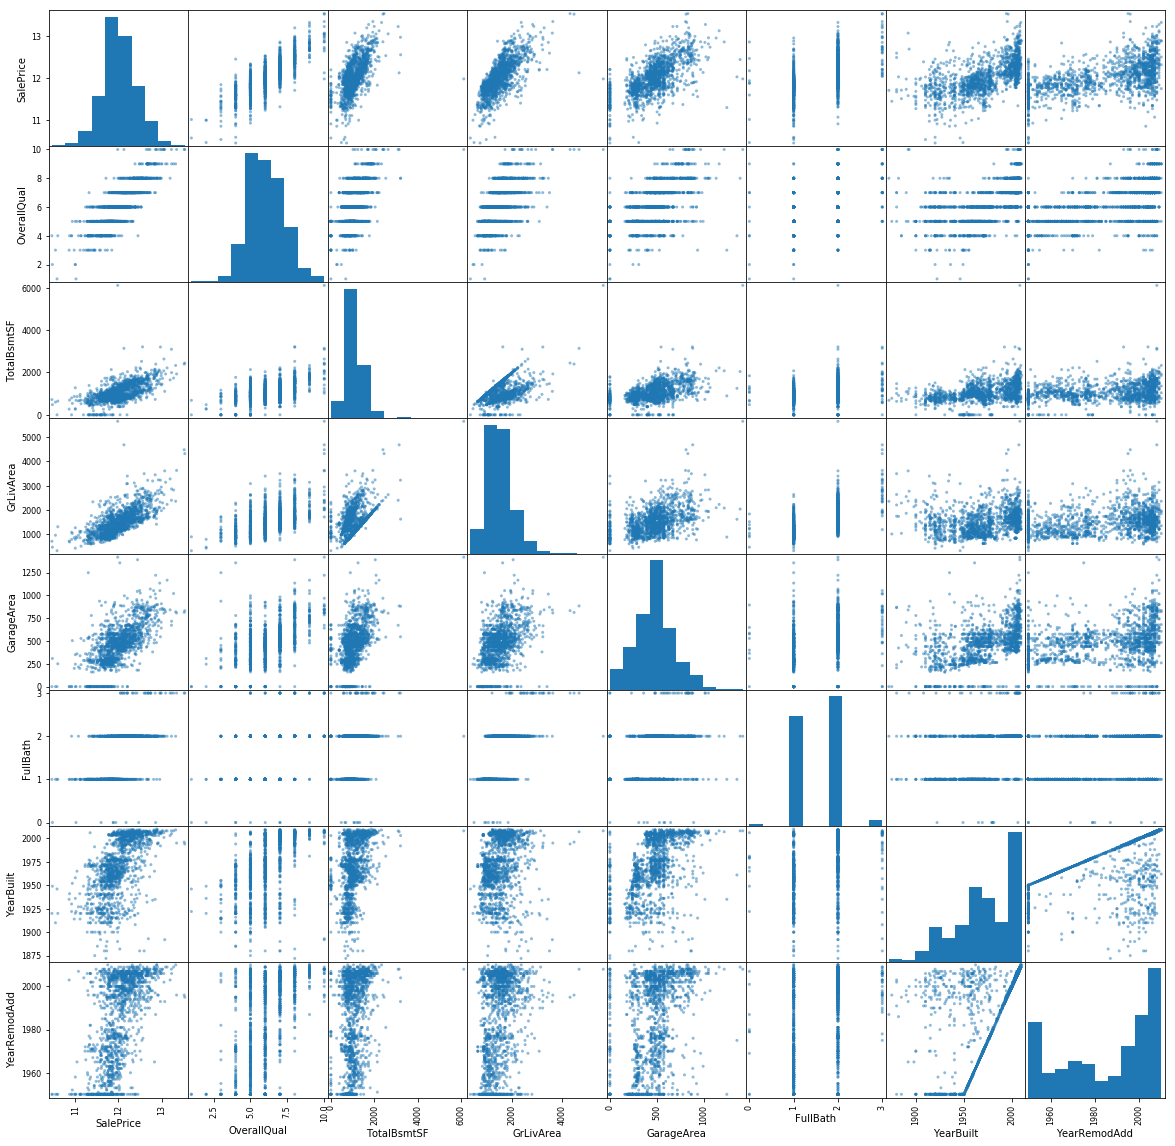

<Figure size 432x288 with 0 Axes>

In [65]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
pandas.plotting.scatter_matrix(train_data[columns],figsize=(20,20))
plt.figure()
